In [1]:
from typing import TypedDict    
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name:str
    age:str
    skills:list[str]
    result:str

def first_node(state:AgentState)-> AgentState:
    """This function process the name of the agent"""
    state["result"]= f"Hello {state['name']}! , "
    return state

def second_node(state:AgentState)-> AgentState:
    """This function process the age  of the agent"""
    state["result"]+= f"you are {state['age']} years old!"
    return state

def third_node(state:AgentState)-> AgentState:
    """This function process the skill of the agent"""
    state['result']+= f" and your skills are {', '.join(state['skills'])}."
    return state

In [4]:
graph=StateGraph(AgentState)
graph.add_node("first",first_node)
graph.add_node("second",second_node)
graph.add_node("third",third_node)
graph.set_entry_point("first")  
graph.add_edge("first","second")
graph.add_edge("second","third")
graph.set_finish_point("third")
app=graph.compile() 
answer=app.invoke({"name":"Sher","age":"22","skills":["Python","Machine Learning","Data Science"]}) 
print(answer)


{'name': 'Sher', 'age': '22', 'skills': ['Python', 'Machine Learning', 'Data Science'], 'result': 'Hello Sher! , you are 22 years old! and your skills are Python, Machine Learning, Data Science.'}


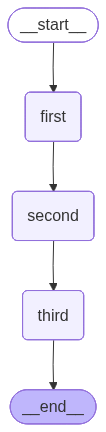

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))